In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# caminhos para os csvs
ocorrencia_path = './dados/ocorrencia.csv'    
aeronave_path = './dados/aeronave.csv'    
ocorrencia_tipo_path = './dados/ocorrencia_tipo.csv'    
fator_contribuinte_path = './dados/fator_contribuinte.csv'    
recomendacao_path = './dados/recomendacao.csv'    

# datesets completos
ocorrencia = pd.read_csv(ocorrencia_path, encoding="latin1", sep=";")
aeronave = pd.read_csv(aeronave_path, encoding="latin1", sep=";")
ocorrencia_tipo = pd.read_csv(ocorrencia_tipo_path, encoding="latin1", sep=";")
fator_contribuinte = pd.read_csv(fator_contribuinte_path, encoding="latin1", sep=";")
recomendacao = pd.read_csv(recomendacao_path, encoding="latin1", sep=";")

# datasets reduzidos
ocorrencia_small = ocorrencia.loc[:, ['codigo_ocorrencia', 'codigo_ocorrencia2', 'ocorrencia_classificacao', 'ocorrencia_uf', 'ocorrencia_dia']]
aeronave_small = aeronave.loc[:, ['codigo_ocorrencia2', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao']]


In [3]:
# entendimento basico das bases
ocorrencia_tipo_col = ocorrencia['ocorrencia_classificacao'].unique()
ocorrencia_tipo_col
# len(recomendacao_status)

array(['INCIDENTE', 'ACIDENTE', 'INCIDENTE GRAVE'], dtype=object)

In [4]:
cell = ocorrencia.iloc[2:5, 2:5]

# ocorrencia_uberlandia = ocorrencia.loc[ocorrencia['ocorrencia_cidade'] == "UBERLÂNDIA", :]
# ocorrencia_uberlandia

# altenativa com shorthand 
ocorrencia_uberlandia = ocorrencia[ocorrencia['ocorrencia_cidade'] == "UBERLÂNDIA"]
ocorrencia_uberlandia

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
28,87093,87093,87093,87093,87093,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,24/04/2025,19:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
237,86845,86845,86845,86845,86845,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,26/01/2025,17:15:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
284,86715,86715,86715,86715,86715,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,11/03/2025,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
289,86710,86710,86710,86710,86710,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,06/03/2025,13:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12037,40695,40695,40695,40695,40695,INCIDENTE,NaN,NaN,UBERLÂNDIA,MG,...,26/11/2009,01:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
12133,40212,40212,40212,40212,40212,INCIDENTE,***,***,UBERLÂNDIA,MG,...,20/03/2010,12:14:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
12182,39772,39772,39772,39772,39772,INCIDENTE,NaN,NaN,UBERLÂNDIA,MG,...,20/01/2010,18:58:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
12315,38200,38200,38200,38200,38200,INCIDENTE,NaN,NaN,UBERLÂNDIA,MG,...,14/07/2009,13:13:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [5]:
# total de ocorrencias
total_ocorrencias = len(ocorrencia)
total_ocorrencias 

# agrupa as cidades por numero de ocorrencias por estado
ocorrencia_por_uf = ocorrencia.groupby('ocorrencia_uf')['codigo_ocorrencia'].count()
ocorrencia_por_uf.sort_values()

# divide pela população do estado => obtem as ocorrencias dos estados per capta

# agrupa as cidades por numero de ocorrencias por ano




ocorrencia_uf
***      21
AP       33
SE       42
RN       49
AL       67
PB       69
RO       84
PI      104
AC      105
TO      119
RR      129
ES      169
MA      170
CE      247
MS      330
PE      411
DF      424
SC      464
AM      476
PA      585
MT      592
GO      603
BA      605
RS      733
PR      917
MG     1077
RJ     1277
SP     3283
Name: codigo_ocorrencia, dtype: int64

In [6]:
# agora exemplos de join
ocorrencia_aeronave = ocorrencia_small.merge(
    aeronave_small, 
    left_on="codigo_ocorrencia2", 
    right_on="codigo_ocorrencia2", 
    how="inner"
)

ocorrencia_aeronave.head(5)


,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_dia,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao
0,87125,87125,INCIDENTE,CE,11/05/2025,EMBRAER,ERJ 190-400,E295
1,87124,87124,INCIDENTE,MG,08/05/2025,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-72-212A (600),AT76
2,87123,87123,INCIDENTE,SP,09/05/2025,AIRBUS S.A.S.,A320-271N,A20N
3,87122,87122,INCIDENTE,RS,04/05/2025,ATR - GIE AVIONS DE TRANSPORT RÉGIONAL,ATR-72-212A (600),AT76
4,87121,87121,INCIDENTE,SP,10/05/2025,AIRBUS,A320-214,A320


In [7]:
# transformações no dataframe
def get_year(date_str):
    return int(date_str.split('/')[2])

# add no dataframe
datas = ocorrencia['ocorrencia_dia']
ocorrencia = ocorrencia.assign(ocorrencia_ano=datas.apply(get_year)) # cria nova coluna ocorrencia_ano
ocorrencia.head(5)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_ano
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,04:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2025
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2025
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2025
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,14:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2025
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,...,10:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2025


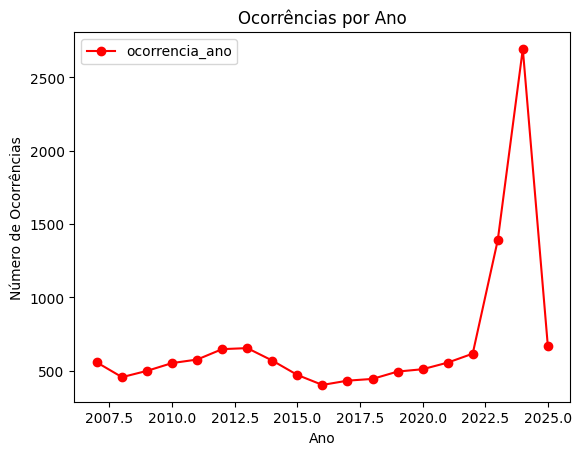

In [8]:
# queries mais complexas

ocorrencia_por_ano = ocorrencia.groupby('ocorrencia_ano')['codigo_ocorrencia'].count()
plt.plot(ocorrencia_por_ano, marker="o", color="red", label="ocorrencia_ano")

# Add labels and title
plt.xlabel("Ano")
plt.ylabel("Número de Ocorrências")
plt.title("Ocorrências por Ano")
plt.legend()

# Show the plot
plt.show()

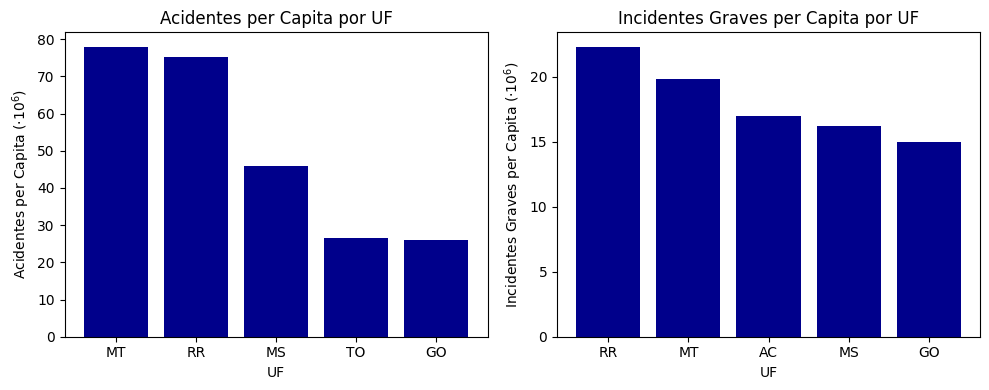

In [9]:
# estado com maior incidencia de ocorrencias
data = {
    "ocorrencia_uf": [
            "RO", "AC", "AM", "RR", "PA", "AP", "TO",
            "MA", "PI", "CE", "RN", "PB",
            "PE", "AL", "SE", "BA",
            "MG", "ES", "RJ", "SP",
            "PR", "SC", "RS",
            "MS", "MT", "GO", "DF"
        ],
    "pop_estimada_2024": [
        1746227, 880631, 4281209, 716793, 8664306, 802837, 1577342,
        7010960, 3375646, 9233656, 3446071, 4145040,
        9539029, 3220104, 2291077, 14850513,
        21322691, 4102129, 17219679, 45973194,
        11824665, 8058441, 11229915,
        2901895, 3836399, 7350483, 2982818
    ]
}

pop_uf = pd.DataFrame(data)
acidente_por_uf = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'ACIDENTE'].groupby('ocorrencia_uf')['codigo_ocorrencia'].count()
acidente_merged = pd.merge(acidente_por_uf, pop_uf, on="ocorrencia_uf", how="inner")
acidente_merged['razao'] = acidente_merged['codigo_ocorrencia'] / acidente_merged['pop_estimada_2024']
acidente_merged[['ocorrencia_uf', 'razao']]
data_barplot_acidente = acidente_merged[['ocorrencia_uf', 'razao']].sort_values(ascending=False, by='razao').head(5)

grave_por_uf = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'INCIDENTE GRAVE'].groupby('ocorrencia_uf')['codigo_ocorrencia'].count()
grave_merged = pd.merge(grave_por_uf, pop_uf, on="ocorrencia_uf", how="inner")
grave_merged['razao'] = grave_merged['codigo_ocorrencia'] / grave_merged['pop_estimada_2024']
grave_merged[['ocorrencia_uf', 'razao']]
data_barplot_grave = grave_merged[['ocorrencia_uf', 'razao']].sort_values(ascending=False, by='razao').head(5)

# Cria uma figura com 1 linha e 2 colunas de plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Primeiro gráfico ---
axes[0].bar(data_barplot_acidente['ocorrencia_uf'], data_barplot_acidente['razao'] * 10**6, color='darkblue')
axes[0].set_title("Acidentes per Capita por UF")
axes[0].set_xlabel("UF")
axes[0].set_ylabel(r"Acidentes per Capita ($\cdot 10^6$)")

# --- Segundo gráfico ---
axes[1].bar(data_barplot_grave['ocorrencia_uf'], data_barplot_grave['razao'] * 10**6, color='darkblue')
axes[1].set_title("Incidentes Graves per Capita por UF")
axes[1].set_xlabel("UF")
axes[1].set_ylabel(r"Incidentes Graves per Capita ($\cdot 10^6$)")

plt.tight_layout()  # Ajusta espaçamento automático
plt.show()

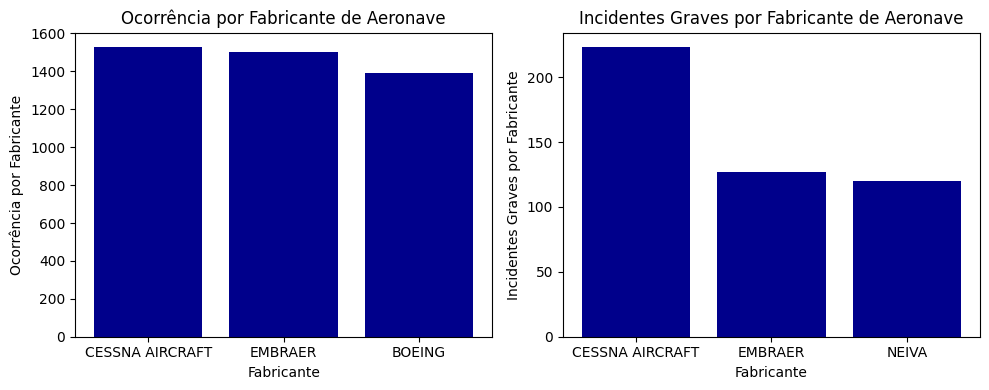

In [10]:
# dataset reduzido com dados da aeronave
aeronave_ocorrencia = pd.merge(ocorrencia_small, aeronave_small, on="codigo_ocorrencia2", how="inner")
ocorr_fabricante = aeronave_ocorrencia.groupby('aeronave_fabricante')['codigo_ocorrencia'].count().reset_index()
barplot_data = ocorr_fabricante.sort_values(ascending=False, by='codigo_ocorrencia').head(3)

grave_fabricante = aeronave_ocorrencia[aeronave_ocorrencia['ocorrencia_classificacao'] == 'INCIDENTE GRAVE'].groupby('aeronave_fabricante')['codigo_ocorrencia'].count().reset_index()
barplot_data_grave = grave_fabricante.sort_values(ascending=False, by='codigo_ocorrencia').head(3)

# Cria uma figura com 1 linha e 2 colunas de plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Primeiro gráfico ---
axes[0].bar(barplot_data['aeronave_fabricante'], barplot_data['codigo_ocorrencia'], color='darkblue')
axes[0].set_title("Ocorrência por Fabricante de Aeronave")
axes[0].set_xlabel("Fabricante")
axes[0].set_ylabel("Ocorrência por Fabricante")

# --- Segundo gráfico ---
axes[1].bar(barplot_data_grave['aeronave_fabricante'], barplot_data_grave['codigo_ocorrencia'], color='darkblue')
axes[1].set_title("Incidentes Graves por Fabricante de Aeronave")
axes[1].set_xlabel("Fabricante")
axes[1].set_ylabel("Incidentes Graves por Fabricante")

plt.tight_layout()  # Ajusta espaçamento automático
plt.show()

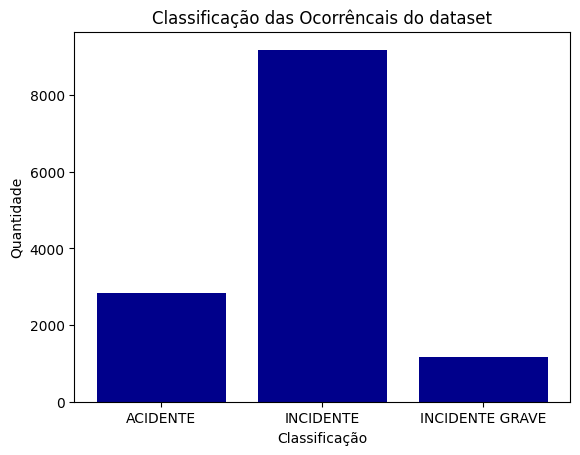

In [14]:
# classificacao das instancias do dataset
ocorr_cat = ocorrencia_small.groupby('ocorrencia_classificacao')['codigo_ocorrencia'].count().reset_index()
ocorr_cat

# Criar o gráfico de barras
plt.bar(ocorr_cat['ocorrencia_classificacao'], ocorr_cat['codigo_ocorrencia'], color='darkblue')

# Adicionar título e rótulos
plt.title("Classificação das Ocorrêncais do dataset")
plt.xlabel("Classificação")
plt.ylabel("Quantidade")

# Mostrar o gráfico
plt.show()